In [110]:
tf.config.list_physical_devices("GPU")

[]

In [138]:
!pip install tensorflow

In [112]:
!pip install keras --upgrade

In [113]:
# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions
# Importing Libraries
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version: {tf.__version__}")
# print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.13.0


In [114]:
# Q2. Load the Wine Quality dataset and explore its dimensions.
# Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

dataset = pd.read_csv("wine.csv")
dataset.shape

(1599, 12)

In [115]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [117]:
# Q3. Check for null values, identify categorical variables, and encode them.

numerical_columns = dataset.columns[:-1].values
catogerical_columns = dataset.columns[-1]
print(numerical_columns)
print(catogerical_columns)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
quality


In [118]:
dataset['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [119]:
dataset['quality'] = dataset['quality'].map({'good': 1, 'bad': 0}).astype(int)

In [120]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [122]:
# Q4. Separate the features and target variables from the dataframe.
X = dataset.drop("quality",axis=1) #Independent data / features
y = dataset['quality'] #Dependent data / target variable

In [123]:
# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [124]:
# Q6. Perform scaling on the dataset.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [125]:
# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

LAYERS = [tf.keras.layers.Input(shape=(X_train.shape[1],),name="inputLayer"),
          tf.keras.layers.Dense(30, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(30, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="softmax", name="outputLayer")]

In [126]:
# Q8. Create a Sequential model and add all the layers to it.

model = tf.keras.models.Sequential(LAYERS)

In [127]:
# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [128]:
# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [129]:
# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',  # Choose the metric to monitor for saving the best model
    save_best_only=True,
)

In [130]:
# Q12. Print the model summary.

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 30)                360       
                                                                 
 hiddenLayer2 (Dense)        (None, 30)                930       
                                                                 
 outputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

optimizer = 'adam'
loss='binary_crossentropy'
metrics=['accuracy']


In [132]:
# Q14. Compile the model with the specified loss function, optimizer, and metrics.

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [133]:
# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

fitted_model = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val), 
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

Epoch 1/50
101/101 [==============================] - 1s 4ms/step - loss: 0.6658 - accuracy: 0.5214 - val_loss: 0.6461 - val_accuracy: 0.5625
Epoch 2/50
 93/101 [==========================>...] - ETA: 0s - loss: 0.6103 - accuracy: 0.5312

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


101/101 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.5214 - val_loss: 0.6352 - val_accuracy: 0.5625
Epoch 3/50
101/101 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.5214 - val_loss: 0.6020 - val_accuracy: 0.5625
Epoch 4/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.5214 - val_loss: 0.5965 - val_accuracy: 0.5625
Epoch 5/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.5214 - val_loss: 0.6043 - val_accuracy: 0.5625
Epoch 6/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.5214 - val_loss: 0.6103 - val_accuracy: 0.5625
Epoch 7/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.5214 - val_loss: 0.6078 - val_accuracy: 0.5625
Epoch 8/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.5214 - val_loss: 0.6178 - val_accuracy: 0.5625
Epoch 9/50
101/10

In [134]:
# Q16. Get the model's parameters.

fitted_model.params

{'verbose': 1, 'epochs': 50, 'steps': 101}

In [135]:
# Q17. Store the model's training history as a Pandas DataFrame.

fitted_model_history = pd.DataFrame(fitted_model.history)
fitted_model_history

,loss,accuracy,val_loss,val_accuracy
0,0.665821,0.521351,0.646145,0.5625
1,0.609075,0.521351,0.635221,0.5625
2,0.559660,0.521351,0.601957,0.5625
3,0.527598,0.521351,0.596471,0.5625
4,0.514880,0.521351,0.604312,0.5625
5,0.507157,0.521351,0.610325,0.5625
6,0.510253,0.521351,0.607781,0.5625
7,0.503793,0.521351,0.617827,0.5625
8,0.497404,0.521351,0.625022,0.5625


<AxesSubplot: >

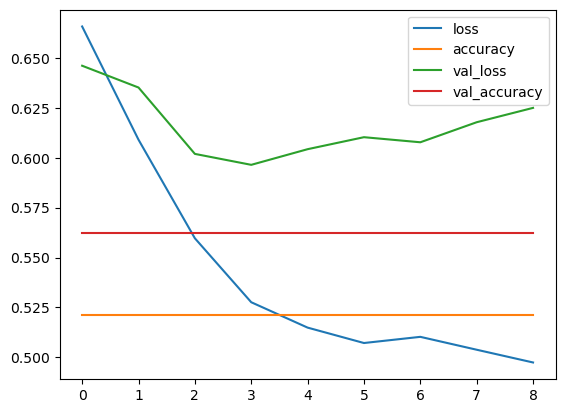

In [136]:
# Q18. Plot the model's training history.

fitted_model_history.plot()

In [137]:
# Q19. Evaluate the model's performance using the test data.

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

15/15 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.5562
Test Loss: 0.5456027984619141
Test Accuracy: 0.5562499761581421
